<p>
    <img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="float:left;width:65px">
    <h1 style="float:left;color:#1A5276;padding-left:15px;font-size:20px;">AWS IoT Analytics | Notebook</h1>
</p>


When loading data from IoT Analytics datasets, the client should be initialized first:

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import boto3


In [41]:
# create IoT Analytics client
client = boto3.client('iotanalytics')

Now we can get the data location (URL) for the given dataset and start working with the data (In order to need to perform get_dataset_content, you need to grant iot analytics corresponding IAM permission):

In [84]:
dataset = "process_emissions_dataset"
dataset_url = client.get_dataset_content(datasetName = dataset)['entries'][0]['dataURI']
data = pd.read_csv(dataset_url)

# start working with the data

In [83]:
data

,vehicle_co2,vehicle_id,timestamp,__dt
0,9638.66,veh3,473.0,2023-04-03 00:00:00.000
1,9638.66,veh3,474.0,2023-04-03 00:00:00.000
2,9638.66,veh3,475.0,2023-04-03 00:00:00.000
3,9638.66,veh3,476.0,2023-04-03 00:00:00.000
4,9638.66,veh3,477.0,2023-04-03 00:00:00.000
...,...,...,...,...
2465,8761.14,veh3,19.0,2023-04-03 00:00:00.000
2466,8761.14,veh3,20.0,2023-04-03 00:00:00.000
2467,8761.14,veh3,21.0,2023-04-03 00:00:00.000
2468,8761.14,veh3,22.0,2023-04-03 00:00:00.000


In [75]:
# Get rid of nans
mask = data.timestamp.isna()
data = data[~mask]

If we wanted to plot our data the following ways might make sense. A line plot shows us the evolution of maximal carbon emissions per vehicle over time. We chose arbitrary time units as in the CSV files. 

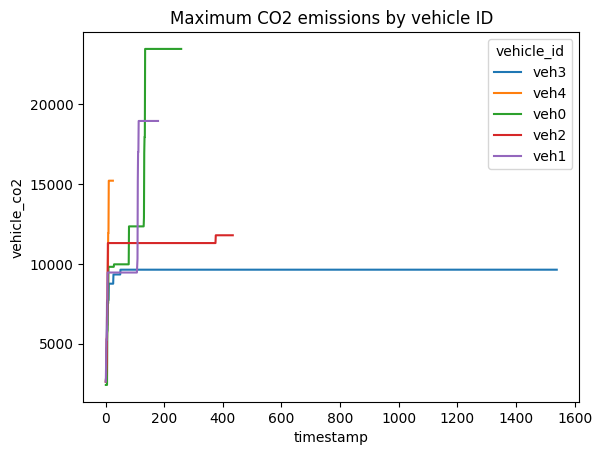

In [90]:
sns.lineplot(x='timestamp', y='vehicle_co2',hue='vehicle_id', data=data, )
_ = plt.title("Maximum CO2 emissions by vehicle ID")

We could interpret this as in terms of which vehicle reaches its maximum CO2 emissions first. Note, this would not, however, be an indication of which vehicle produces the most CO2, because we are only looking at the maximum value. In other words, e.g. vehicle 0 has the highest maximum emission, but it might have spiked and then gone down again. 
We can tell that the measurements were the longest (as in number of measurements or samples) for vehicle 3 and shortest for vehicle 4. 

A variant of this might be the scatter plot. In this example the line plot would be easier to read, though. 

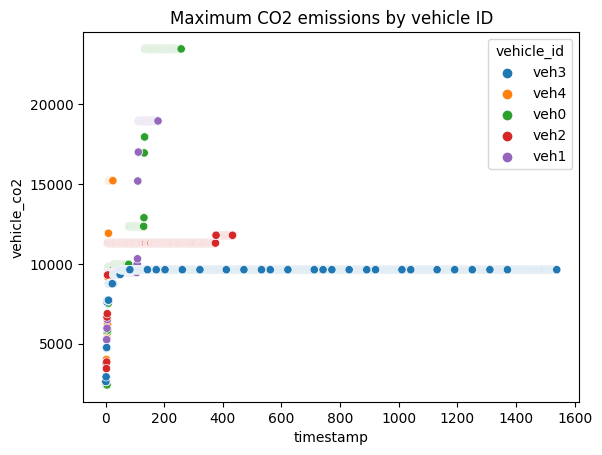

In [91]:
sns.scatterplot(x="timestamp", y="vehicle_co2", hue="vehicle_id", data=data)
_ = plt.title("Maximum CO2 emissions by vehicle ID")

A bar plot gives us better overview of which car contributes the most to maximal carbon emissions. Note, however, in order to get absolute values we would have to use the integral (cumulative sum) over all data, not the maximum which our lambda function reported. 

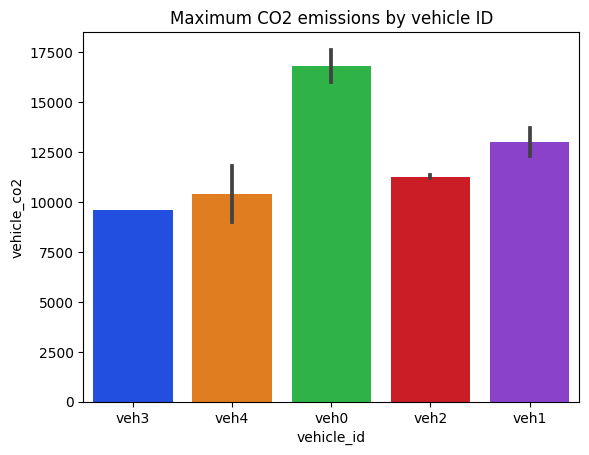

In [92]:
sns.barplot(x='vehicle_id', y='vehicle_co2', data=data, palette='bright')
_ = plt.title("Maximum CO2 emissions by vehicle ID")

In the pie chart below we get a good overview of the relative contributions of each vehicle's maximum CO2 emissions. 

<AxesSubplot:ylabel='vehicle_co2'>

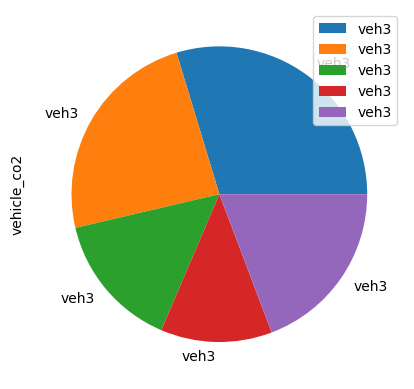

In [107]:
data.groupby('vehicle_id').max().plot.pie(y='vehicle_co2', labels=data['vehicle_id'])

For the same reason the following statistical plots do not give us the real statistical distribution of carbon emissions and are hence included for illustration purposes only. 

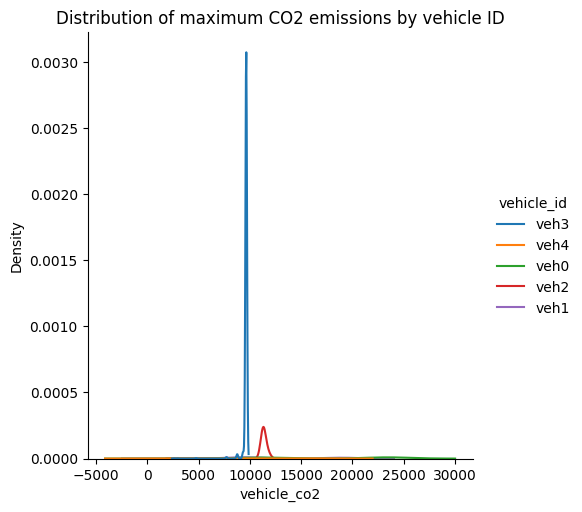

In [93]:
sns.displot(data=data, x="vehicle_co2", hue="vehicle_id", kind="kde")
_ = plt.title("Distribution of maximum CO2 emissions by vehicle ID")

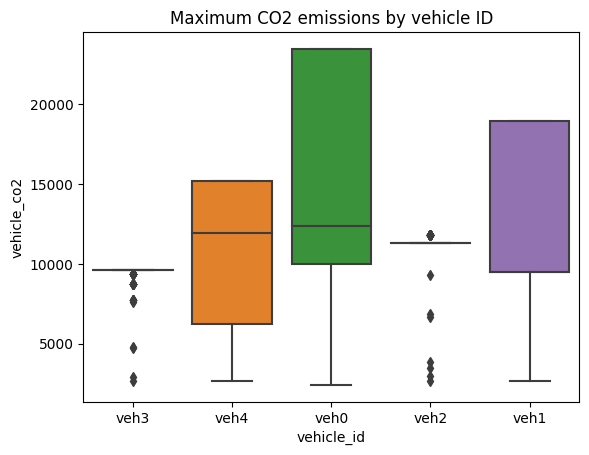

In [94]:
sns.boxplot(x="vehicle_id", y="vehicle_co2", data=data)
_ = plt.title("Maximum CO2 emissions by vehicle ID")

<div style="height:60px;"><div style="height:7px;background-color:#20B3CD;width:100%;margin-top:20px;position:relative;"><img src="https://s3.amazonaws.com/iotanalytics-templates/Logo.png" style="height:50px;width:50px;margin-top:-20px;position:absolute;margin-left:42%;"></div></div>